In [42]:
#import libraries
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import plotly.express as px
import matplotlib.pyplot as plt

#new import
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [43]:
#load dataset
df = pd.read_csv("data/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [45]:
df["Purchased"].unique()

array([0, 1])

In [46]:
# create 'X' and 'y' label 
X = df[["Age", "EstimatedSalary"]]
y = df["Purchased"]

In [47]:
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [48]:
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [55]:
#initialize the model
classifier_model = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)
classifier_model.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [56]:
#predict model
y_pred = classifier_model.predict(X_test)

In [57]:
#Evaluate model
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"\nClassification Report\n: {classification_report(y_test, y_pred)}")
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred)}")

Accuracy Score: 0.8625

Classification Report
:               precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80

Confusion Matrix: [[50  2]
 [ 9 19]]


Text(0.5, 1.0, 'Confusion Matrix')

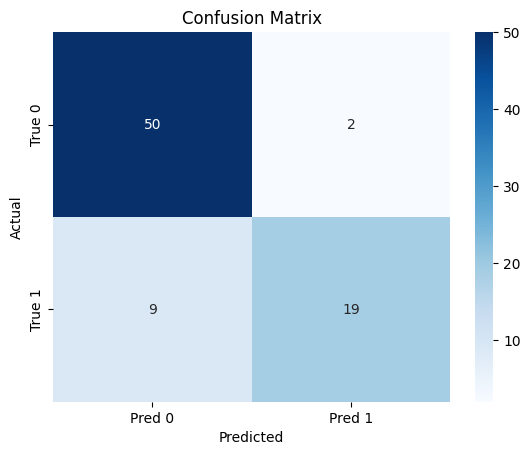

In [58]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

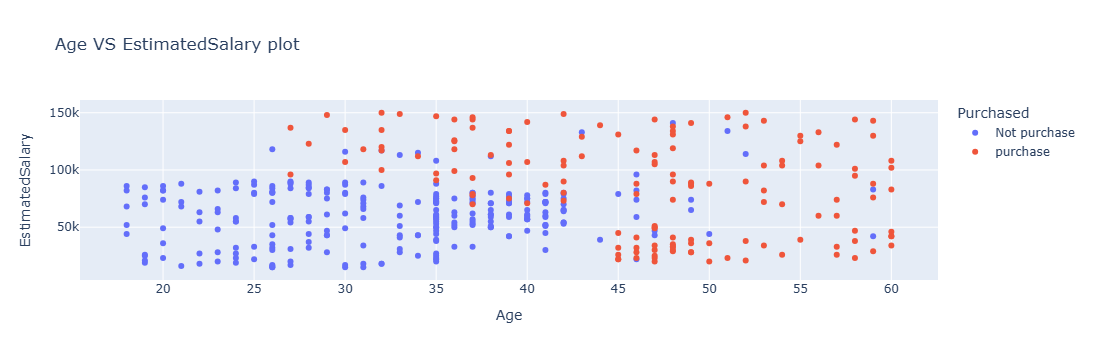

In [64]:
#scatter plot for how user is distributed
fig = px.scatter(
    df, x='Age', y='EstimatedSalary',
    title="Age VS EstimatedSalary plot",
    color=df["Purchased"].map({0: "Not purchase", 1: "purchase"}),
    labels={'color': 'Purchased'}
)
fig.show()

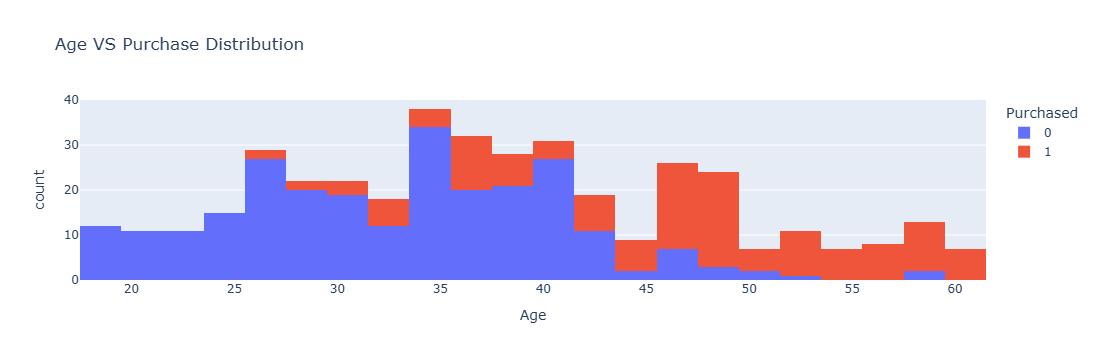

In [67]:
fig = px.histogram(
    df, x='Age', color='Purchased',
    title='Age VS Purchase Distribution'
)

fig.show()

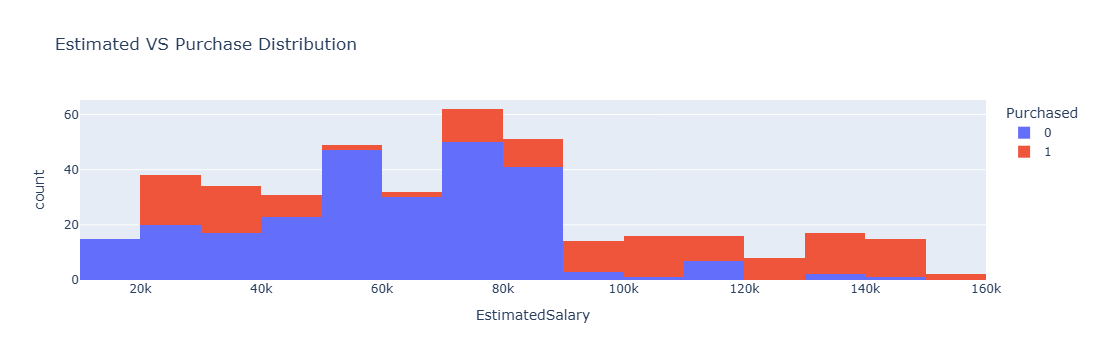

In [73]:
fig = px.histogram(
    df, x='EstimatedSalary', color='Purchased',
    title='Estimated VS Purchase Distribution'
)

fig.show()

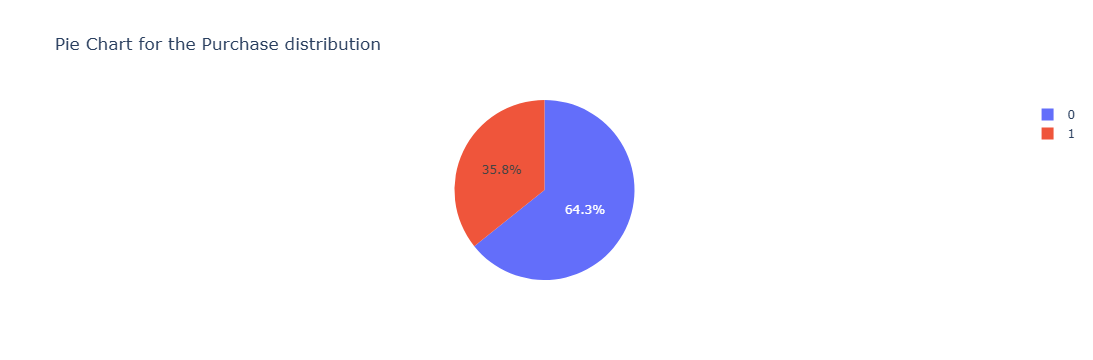

In [89]:
purchase_count = df['Purchased'].value_counts().reset_index()
purchase_count.columns = ["Purchased", "count"]
# purchase_count['Purchased'] = df["Purchased"].map({0: "Not purchase", 1: "purchase"})
purchase_count

fig = px.pie(
    purchase_count,
    names='Purchased',
    values='count',
    title='Pie Chart for the Purchase distribution'
)

fig.show()

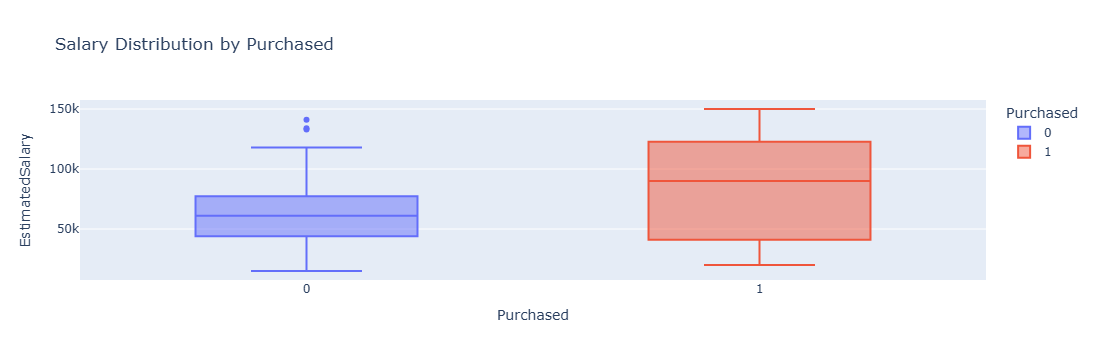

In [94]:
fig = px.box(
    df, x='Purchased', y='EstimatedSalary',
    color='Purchased',
    title="Salary Distribution by Purchased"
)

fig.show()

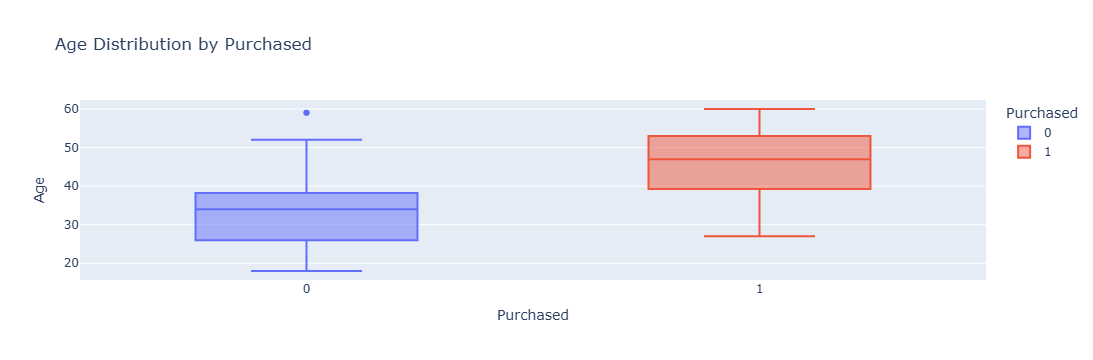

In [93]:
fig = px.box(
    df, x='Purchased', y='Age',
    color='Purchased',
    title="Age Distribution by Purchased"
)

fig.show()